<a href="https://colab.research.google.com/github/wei0728/AI_HW/blob/main/finger_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#module install

In [18]:
!pip install tensorflow keras numpy mnist matplotlib

# module import

In [17]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import keras.utils
from keras import utils as np_utils

# load data

In [19]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


對數據進行相應的處理, 將圖片數據歸一化,同時向量化

In [20]:
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


建立神經網路模型

In [21]:
model = Sequential()
model.add( Dense(64, activation="relu", input_dim = 784))
model.add( Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


進行模型的編繹和訓練

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3619 - accuracy: 0.8910
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1852 - accuracy: 0.9435
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1431 - accuracy: 0.9559
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1184 - accuracy: 0.9631
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1041 - accuracy: 0.9681
dict_keys(['loss', 'accuracy'])


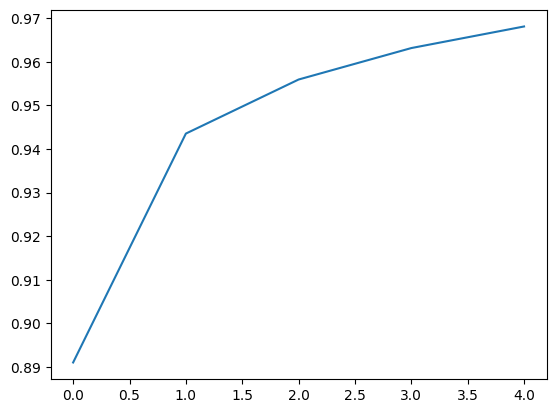

In [22]:
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
from tensorflow.python.keras.utils import np_utils
history=model.fit(
    train_images,
    np_utils.to_categorical(train_labels),
    epochs = 5,
    batch_size = 32

)

print(history.history.keys())
print(plt.plot(history.history['accuracy']))

評估模型

In [23]:
model.evaluate(
    test_images,
    np_utils.to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9650


[0.10998070240020752, 0.9649999737739563]

進行預測, 我們使用的是自己手寫的醜字來測試

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


show my words

In [132]:
import os
from google.colab import drive
path = "/content/drive/MyDrive/AI_mid_report"
os.chdir(path)
os.listdir(path)

['finger_identify.ipynb', '4.jpg', '1.jpg', '2.jpg', '8.jpg', '5.jpg']

In [134]:
from PIL import Image
img = Image.open("8.jpg").convert('1')
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,784)
y_pred = model.predict(im2arr)
print(np.argmax(y_pred, axis = 1))

1/1 [==============================] - 0s 22ms/step
[8]
